# Comprobación de la ecuación de Klein Gordon.

Comprobamos la solución de Klein-Gordon como la expresión no relativista de la ec. de Schrödinger.

En este caso, usaremos la siguiende PDE para simular:

\begin{equation*}
\large-\frac{\hbar}{2m}\frac{\partial^2\phi}{\partial x^2}=i\hbar\frac{\partial^2 \phi}{\partial t^2}
\end{equation*}

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy import constants
import scipy as sp
from time import time
from jupyterthemes import jtplot
#sns.set_style('darkgrid')
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(10, 7))

In [2]:
def tiempo_total(tiempo):
    tiempo_calculado=time()
    tiempo_final=(tiempo_calculado-tiempo)
    if (tiempo_final>3600):
        print('El código tardo %s horas en ejecutarse.' % (tiempo_final/3600))
        print('\n')
    elif (tiempo_final>60):
        print('El código tardo %s minutos en ejecutarse.' % (tiempo_final/60))
        print('\n')
    else:
        print('El código tardo %s segundos en ejecutarse.' % tiempo_final)
        print('\n')

In [3]:
def CFL(D,dx,dt):
    k=D*(dt/dx**2)
    print("El coeficiente de Courant Friedrichs Lewy (CFL) es",k)
    return k
def CI(x,Ix,t):
    u=np.zeros(Ix,dtype=np.complex)
    for i in range(0,Ix):
        u[i]=np.sin(x[i])
    return u
def BC(dx,dt,Ix,t,u):
    u[0]=0
    u[Ix-1]=0
    return u
def lder(x,Ix,t):
    derecha=np.zeros(Ix)
    return derecha

In [4]:
def matrizA(Ix,k,dt):
    A=np.zeros((Ix,Ix),dtype=np.complex) #Comando que genera una matrix de nxn dimensiones.
    A[0,0]=A[Ix-1,Ix-1]=1 #Condiciones de frontera para nuestra matriz.
    
    #Ciclo para generar la matriz de valores A.
    for i in range(1,Ix-1):
        A[i,i-1]=-1*k
        A[i,i]= 2*(1+k)
        A[i,i+1]=-1*k
    return A

In [5]:
def metodo_implicito(A,dx,dt,Ix,It,x,t,xf,u,lder,BC):
    f1=lder(x,Ix,t)
    #Generamos la matrix b para la solución del problema.
    b=u.copy()
    #Ahora le asignamos valores
    for i in range(1,Ix-1):
        b[i]=b[i]+dt*f1[i]
    #Usamos un comando para solucionar la matrix A*p=b
    u=np.linalg.solve(A,b)
    u=BC(dx,dt,Ix,t,u)
    return u

In [6]:
def update_line(uSol):
    line.set_data(uSol)
    return line,

def Graf(x,uSol,t,Ix,It):
    fig=plt.figure()
    l=plt.plot(x,np.real(uSol))
    #plt.plot(x,np.imag(uSol))
    plt.title('Ecuacion de onda')
    plt.xlabel('Distancia recorrida.')
    plt.ylabel('$\phi(x,t)$.')
    plt.grid()
    plt.show()
    ani= animation.FuncAnimation(fig, update_line, frames=10, fargs=(uSol, l),
                                   interval=50, blit=True)
    #ani

In [7]:
def txt(x,t,Ix,It,pSol):
    t1=open("graf_t0.txt","w")
    t2=open("graf_t1.txt","w")
    t3=open("graf_t2.txt","w")
    t4=open("graf_3d.txt","w") #La gráfica en 3D
    #Datos para gráficar en 2d a distintos tiempos.
    for i in range(0,Ix):
        t1.write(str(x[i])); t1.write(" "); t1.write(str(pSol[i,1]))
        t1.write("\n")

        t2.write(str(x[i])); t2.write(" "); t2.write(str(pSol[i,int(Ij/2)]))
        t2.write("\n")

        t3.write(str(x[i])); t3.write(" "); t3.write(str(pSol[i,int(Ij-1)]))
        t3.write("\n")

    #Datos para graficar en 3D.
    for j in range(0,It):
        for i in range(0,Ix):
            t4.write(str(x[i])); t4.write(" "); t4.write(str(t[j]))
            t4.write(" "); t4.write(str(pSol[i,j])); t4.write("\n")

    t1.close(); t2.close(); t3.close(); t4.close()

In [8]:
def Solucion( ):
    tiempo=time()
    xf=10   #Metros recorridos por el sistema.
    tf=5   #Segundos simulados.
    h=constants.hbar #Constante de Planck
    m=1 #1 kg
    D=-1j/2*m
    Ix=101
    It=201
    dx=xf/(Ix-1) #El paso finito de la distancia.
    dt=xf/(It-1) #El paso finito del tiempo.
    x=np.linspace(-10,xf,Ix)
    t=np.linspace(0,tf,It)

    k=CFL(D,dx,dt) #El coeficiente CFL

    A=matrizA(Ix,k,dt)
    uSol=np.zeros((Ix,It),dtype=np.complex)

    for j in range(0,It):
        if (j==0):
            u=CI(x,Ix,t)
            u=BC(dx,dt,Ix,t,u)
        else:
            u=metodo_implicito(A,dx,dt,Ix,It,x,t[j-1],xf,u,lder,BC)-u
        for i in range(0,Ix):
            uSol[i,j]=u[i]

    graficar=Graf(x,uSol,t,Ix,It)
    #archivos=txt(x,t,Ix,It,uSol)
    tiempo_final=tiempo_total(tiempo)

El coeficiente de Courant Friedrichs Lewy (CFL) es -2.4999999999999996j


<IPython.core.display.Javascript object>


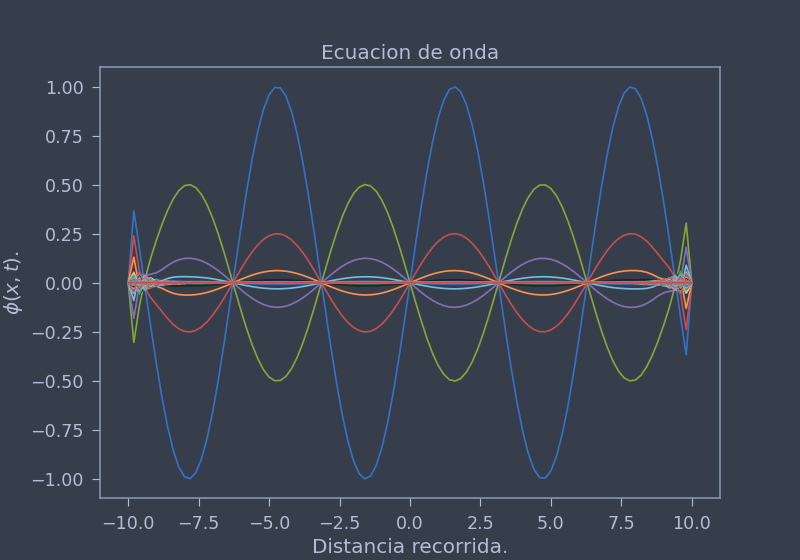

El código tardo 0.48894190788269043 segundos en ejecutarse.




In [9]:
if ( __name__ == '__main__' ):
    grafica=Solucion()

Por otra parte, nosotros tambien podemos comprobar con la ecuación de Klein-Gordon que contiene efectos relativistas. En este caso, la PDE es:

\begin{equation*}
\large\left[\frac{1}{c^2}\frac{\partial^2}{\partial t^2}-\nabla^2+\frac{m^2c^2}{\hbar^2}\right]\phi=0
\end{equation*}

Podemos usar la gran mayoria de las funciones pasadas, solamente debemos alterar algunas.

In [10]:
def matrizA(Ix,k,F,dt):
    A=np.zeros((Ix,Ix)) #Comando que genera una matrix de nxn dimensiones.
    A[0,0]=A[Ix-1,Ix-1]=1 #Condiciones de frontera para nuestra matriz.
    
    #Ciclo para generar la matriz de valores A.
    for i in range(1,Ix-1):
        A[i,i-1]=-1*k
        A[i,i]=(2-2*k-F)
        A[i,i+1]=-1*k
    return A

def Solucion( ):
    tiempo=time()
    xf=10   #Metros recorridos por el sistema.
    tf=25   #Segundos simulados.
    h=constants.hbar #Constante de Planck
    m=1 #1 kg
    D=(constants.c)**2
    Ix=101
    It=201
    dx=xf/(Ix-1) #El paso finito de la distancia.
    dt=xf/(It-1) #El paso finito del tiempo.
    x=np.linspace(-10,xf,Ix)
    t=np.linspace(0,tf,It)

    k=CFL(D,dx,dt) #El coeficiente CFL
    F=dt*((m**2)*(D**2))/(h**2)

    A=matrizA(Ix,k,F,dt)
    uSol=np.zeros((Ix,It))

    for j in range(0,It):
        if (j==0):
            u=CI(x,Ix,t)
            u=BC(dx,dt,Ix,t,u)
        else:
            u=metodo_implicito(A,dx,dt,Ix,It,x,t[j-1],xf,u,lder,BC)-u

        for i in range(0,Ix):
            uSol[i,j]=u[i]
    graficar=Graf(x,uSol,t,Ix,It)
    #archivos=txt(x,t,Ix,It,uSol)
    tiempo_final=tiempo_total(tiempo)

El coeficiente de Courant Friedrichs Lewy (CFL) es 4.493775893684087e+17


/home/ricardo_leal420/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


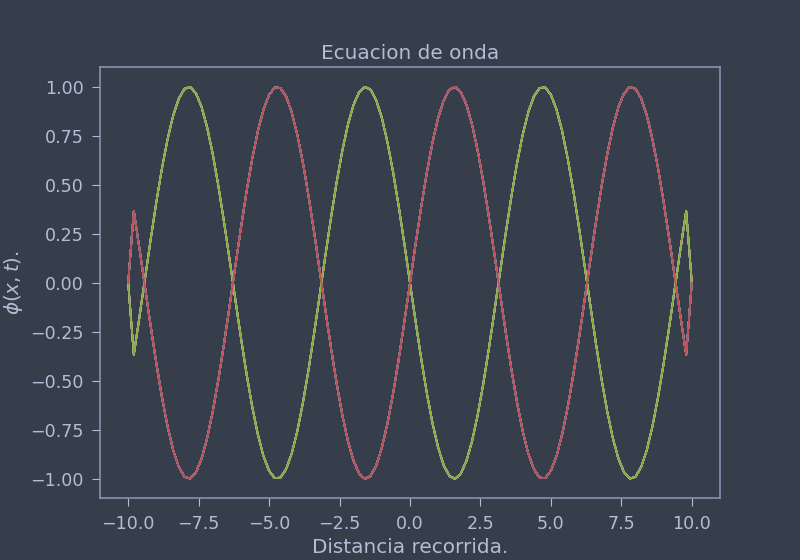

El código tardo 0.6906864643096924 segundos en ejecutarse.




In [11]:
if ( __name__ == '__main__' ):
    grafica=Solucion()

Siendo esta nuestra solución relativista.